In [1]:
import numpy
import netCDF4
import matplotlib
import matplotlib.pyplot as mp
import datetime

import matplotlib.patches
import matplotlib.ticker

import mpl_toolkits.axes_grid1
import cartopy

degree_sign = u'\u00B0'

% matplotlib inline

In [2]:
run_info = '50km_idealized_noahmp_ens_mean'

In [6]:
geo_em_ncfile = netCDF4.Dataset('/Users/baird/Dropbox/_data_WRF/geo_em.d01_amazon_50km.nc')
lu_index = geo_em_ncfile.variables['LU_INDEX'][0,:,:]

In [7]:
modis_type_dict = {}
modis_type_dict['0'] = 'Water'
modis_type_dict['1'] = 'Evergreen needleleaf forest'
modis_type_dict['2'] = 'Evergreen broadleaf forest'
modis_type_dict['3'] = 'Deciduous needleleaf forest'
modis_type_dict['4'] = 'Deciduous broadleaf forest'
modis_type_dict['5'] = 'Mixed forest'
modis_type_dict['6'] = 'Closed shrublands'
modis_type_dict['7'] = 'Open shrublands'
modis_type_dict['8'] = 'Woody savannas'
modis_type_dict['9'] = 'Savannas'
modis_type_dict['10'] = 'Grasslands'
modis_type_dict['11'] = 'Permanent wetlands'
modis_type_dict['12'] = 'Croplands'
modis_type_dict['13'] = 'Urban and built-up'
modis_type_dict['14'] = 'Cropland/natural vegetation mosaic'
modis_type_dict['15'] = 'Snow and ice'
modis_type_dict['16'] = 'Barren or sparsely vegetated'
modis_type_dict['254'] = 'Unclassified'
modis_type_dict['255'] = 'Fill Value'

In [8]:
type_numbers = numpy.arange(1,17,dtype=numpy.int)
type_name = [modis_type_dict[str(i)] for i in type_numbers]

In [9]:
# colors_list = ['darkgreen','forestgreen','darkolivegreen','olivedrab','yellowgreen',\
#               'saddlebrown','sienna','peru','burlywood','wheat',
#               'darkturquoise','gold',\
#               'red','firebrick',\
#               'lightcyan','None']
# colors_list = ['darkgreen','forestgreen','darkolivegreen','olivedrab','yellowgreen',\
#               'darkred','sienna','peru','burlywood','wheat',
#               'gold','orange',\
#               'red','palegreen',\
#               'lightcyan','None']
colors_list = ['darkgreen','forestgreen','darkolivegreen','olivedrab','yellowgreen',\
              'darkred','sienna','peru','burlywood','wheat',
              'gold','orange',\
              'red','palegreen',\
              'lightcyan','0.9']
categorical_cmap = matplotlib.colors.ListedColormap(colors_list, name='baird')
n_categories = len(colors_list)

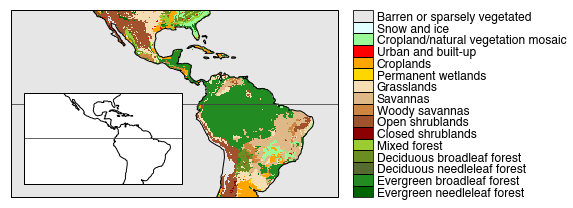

In [22]:
fontsize=12

levels = numpy.arange(-20,21,5)
fig = mp.figure(figsize=(5.5,3))

ax = fig.add_subplot(111, projection=cartopy.crs.PlateCarree())
ax.gridlines(ylocs=[0], color='0.25')
ax.coastlines(resolution='110m')
ax.set_extent([xlong.min(), xlong.max(), xlat.min(), xlat.max()], crs=cartopy.crs.PlateCarree())

land_use_map = ax.pcolormesh(xlong,xlat,lu_index,cmap=categorical_cmap,vmin=1,vmax=17)

fig.tight_layout()
bbox_ax = ax.get_position()

divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
#cbar_ax = divider.append_axes('right', size='3%', pad=0.25, map_projection=cartopy.crs.PlateCarree())
cbar_ax = fig.add_axes([bbox_ax.x1-0.02,bbox_ax.y0,0.05,bbox_ax.height])
cbar = fig.colorbar(land_use_map, cax=cbar_ax, drawedges=True)
cbar.dividers.set_color('0')
cbar.dividers.set_linewidth(1)
cbar.set_ticks(numpy.arange(1.5,16.6,1))
cbar.set_ticklabels(type_name)
# for t in cbar.ax.get_yticklabels():
#     #t.set_verticalalignment('center')
cbar.ax.tick_params(labelsize=fontsize, length=0)

ax_small = fig.add_axes([0.12,0.09,0.4,0.5], projection=cartopy.crs.PlateCarree())
ax_small.gridlines(ylocs=[0], color='0.25')
ax_small.coastlines(resolution='110m')
ax_small.set_extent([xlong.min(), xlong.max(), xlat.min(), xlat.max()], crs=cartopy.crs.PlateCarree())

#fig.savefig('land_use_domain_info.png', dpi=600, transparent=True, bbox_inches='tight')